# Finding the Convex Hull of a Point-Set in $\mathbb R^2$

In this worksheet, we will compute the convex hull of a point-set in $\mathbb R^2$ using the gift wrapping algorithm and visualize it.

In [1]:
# import numpy as np
import matplotlib.pyplot as plt
import random

First, we define a class to represent points in $\mathbb R^2$. Write in code where indicated.

In [2]:
# A point in two dimensions
class PointR2:
    # We will represent points with coordinates x1 and x2
    def __init__(self, x1, x2):
        self.x1 = x1
        self.x2 = x2
        
    # This is how the point is represented if printed
    def __repr__(self):
        return '(' + str(self.x1) + ', ' + str(self.x2) + ')'
    
    # Add the point with a given point p and return the result
    def add(self, p):
        return PointR2(self.x1 + p.x1, self.x2 + p.x2)
    
    # Subtract a given point p from the point and return the result
    def subtract(self, p):
        return PointR2(self.x1 - p.x1, self.x2 - p.x2)
    
    # Return the squared length (x1^2 + x2^2) of the point
    def sqrLen(self):
        return self.x1*self.x1 + self.x2*self.x2

We will now define some functions to deal with points that will be useful for the algorithm.

In [3]:
# View two 2D vectors as 3D vectors with a 0 x3 component, and find the
# x3 component of their cross product.
#
# Input: two vectors p, q in R2 (as Points)
# Output: the x3 component of p x q (when viewed as 3D vectors)
def crossProd(p, q):
    return p.x1 * q.x2 - q.x1 * p.x2

# Find the square of the Euclideam distance between points p and q
def sqrDist(p, q):
    return (p.x1 - q.x1)**2 + (p.x2 - q.x2)**2
    
# Find where the point r is w.r.t. the line pq and return:
# something > 0 if r is to the left of pq
# something < 0 if r is to the right of pq
# 0             if p,q,r are colinear
def orientation(p, q, r):
    return crossProd(q.subtract(p), r.subtract(p))

## The Gift Wrapping Algorithm

We will now use the gift wrapping algorithm to write a function `getConvexHullR2` which takes a single parameter $T$ (a list of Points), and returns the vertices of the convex hull in clockwise order.

The algorithm goes as follows:
1. Find the left-most point by minimizing over the $x_1$ coordinate and set it to `pointOnHull`.
2. Initialize $i$ to 0.
3. Initialize `Hull` as an empty list.
4. Loop: \
      a. Set `Hull[i]` to `pointOnHull` \
      b. Set `endpoint` to $T[0]$ \
      c. For $j \in \{0,\ldots,|T|-1\}$:
         i. If `endpoint == pointOnHull` or if $T[j]$ lies to the left of the line from $P[i]$ to `endpoint`, then set `endpoint` to $T[j]$.
         ii. $i = i + 1$
         iii. Set `pointOnHull` to `endpoint`
      
   continue Loop from line 4 until endpoint = `Hull[0]` (because we've wrapped around to the first point)
   
Take a moment to think about why this algorithm works (hint: it's similar to selection sort on lists of numbers). We recommend trying it out on a small example on paper.

Now implement it!

In [4]:
# Given a finite set T of points in R2, find the boundary polygon of conv(T).
# Note that this solution is written slightly differently than the pseudocode above.
#
# Input: a set T of Points
# Output: the vertices of the polygon clockwise
def getConvexHullR2(T):
    # minimize over x1-coodinate of points
    p = min(T, key = lambda point: point.x1)
    # get the index of the x1-coord minimizer in the list T
    index = T.index(p);   
    
    l = index
    
    # initialize the resulting convex hull
    result = []
    result.append(p)
    while(True):
        # q is chosen so that q != l
        q = (l + 1) % len(T)
        for i in range(len(T)):
            if i == l:
                continue
            
            # get the orientation of T[i] w.r.t line T[l]T[q]
            d = orientation(T[l], T[q], T[i])
            # if T[i] is to the left of T[l]T[q], do i->q (i is the new leftmost point)
            # if T[i] lies on T[l]T[q], choose T[i] as the new point only if 
            # length of T[l]T[i] is greater than length of T[l]T[q]
            # if i = q then we ignore it
            if d > 0 or (d == 0 and sqrDist(T[l],T[i]) > sqrDist(T[l],T[q])):
                q = i
        # After the for-loop terminates, T[q] is the leftmost w.r.t. T[l]
        l = q
        # we have closed the polygon and are finished
        if l == index:
            break
        # otherwise add T[q] to the path
        result.append(T[q])
    return result

Let us now test the method we wrote by running it on a set of points and plotting the outcome.

In [5]:
# Create a list of N points
N = 50 # pick an N
T = [PointR2(a[0], a[1]) for a in 
    [[random.random() for i in range(2)] for j in range(N)]]

# Compute the convex hull
hull = getConvexHullR2(T)

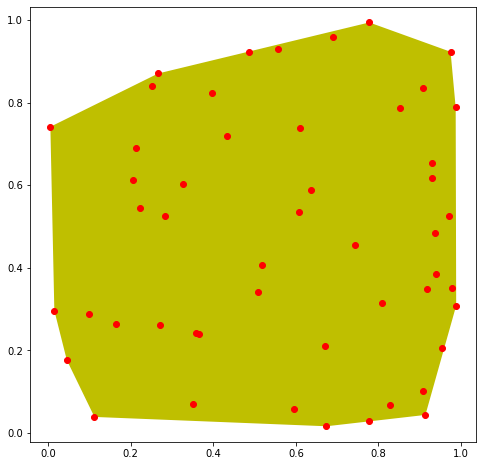

In [6]:
# Plot the points and the hull
# Feel free to play around with the visualization!
plt.figure(figsize = (8,8))
plt.axis('equal')
plt.fill([p.x1 for p in hull], [p.x2 for p in hull], 'y')
plt.plot([p.x1 for p in T], [p.x2 for p in T], 'or')
plt.show()